In [1]:
from google.colab import files
uploaded = files.upload()

Saving Assessment-2-Associate-DS(in).csv to Assessment-2-Associate-DS(in).csv


In [18]:
import pandas as pd

# Change this if the filename is different after upload
file_name = "Assessment-2-Associate-DS(in).csv"

# Load data
df = pd.read_csv(file_name, parse_dates=["weekend_date"])

In [19]:
# Rename column
df.rename(columns={"SerailNum": "SerialNum"}, inplace=True)

In [20]:
# Inspect
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekend_date  600 non-null    object
 1   channel       600 non-null    object
 2   brand         600 non-null    object
 3   category      600 non-null    object
 4   sub_category  600 non-null    object
 5   SerialNum     600 non-null    int64 
 6   quantity      600 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 32.9+ KB
None


In [21]:
print("\n First 5 Rows:")
print(df.head())


 First 5 Rows:
  weekend_date   channel brand category sub_category  SerialNum  quantity
0     4/6/2022  Channel1    B1     Cat2     Sub-Cat2          1        56
1    11/6/2022  Channel1    B1     Cat2     Sub-Cat2          1       122
2   18/06/2022  Channel1    B1     Cat2     Sub-Cat2          1       102
3   25/06/2022  Channel1    B1     Cat2     Sub-Cat2          1       128
4     2/7/2022  Channel1    B1     Cat2     Sub-Cat2          1        97


In [22]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
weekend_date    0
channel         0
brand           0
category        0
sub_category    0
SerialNum       0
quantity        0
dtype: int64


In [23]:
print("\n Descriptive Statistics:")
print(df.describe())


 Descriptive Statistics:
        SerialNum     quantity
count  600.000000   600.000000
mean     3.048333   547.330000
std      1.399737   925.749108
min      1.000000     1.000000
25%      2.000000   121.000000
50%      3.000000   244.500000
75%      4.000000   624.500000
max      5.000000  8051.000000


In [24]:
# Unique counts
print("\n✅ Unique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


✅ Unique Values per Column:
weekend_date: 225
channel: 3
brand: 2
category: 3
sub_category: 4
SerialNum: 5
quantity: 426


Let’s plot to see **trends**

In [26]:
df['quantity'] = df['quantity'].fillna(0)


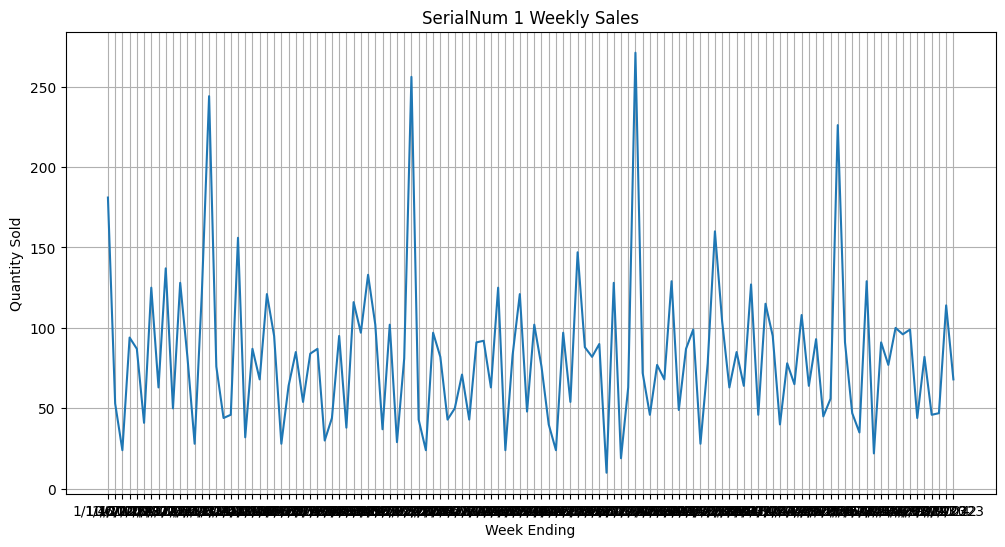

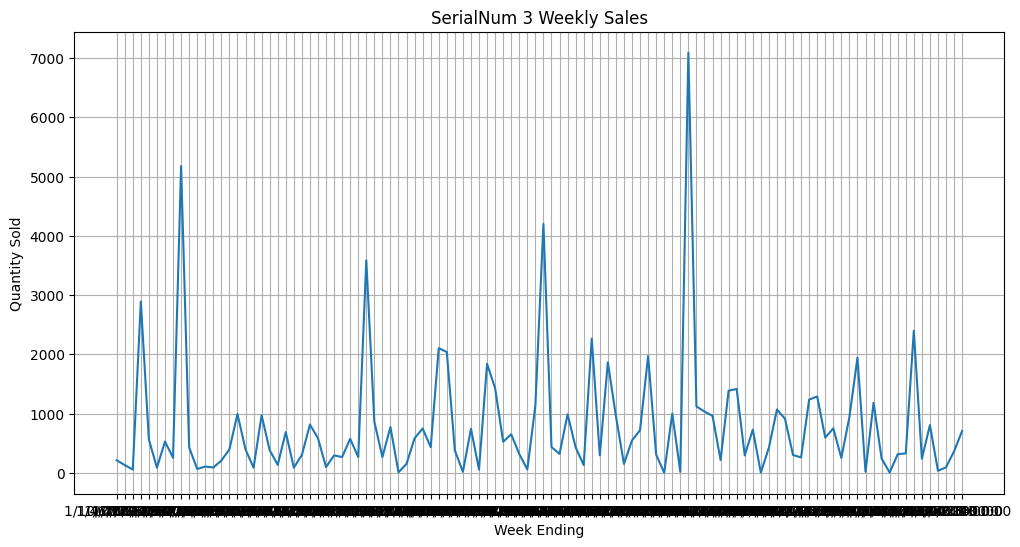

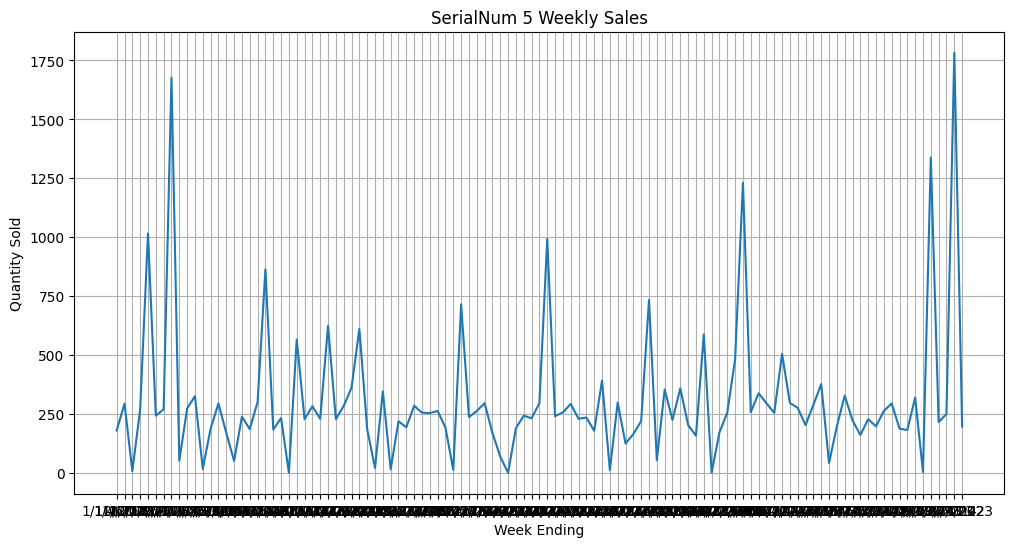

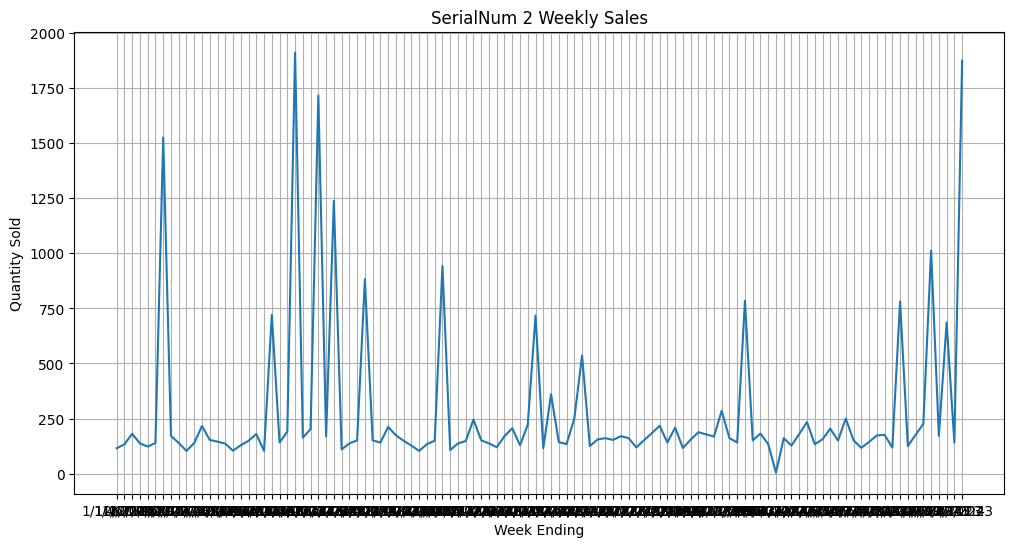

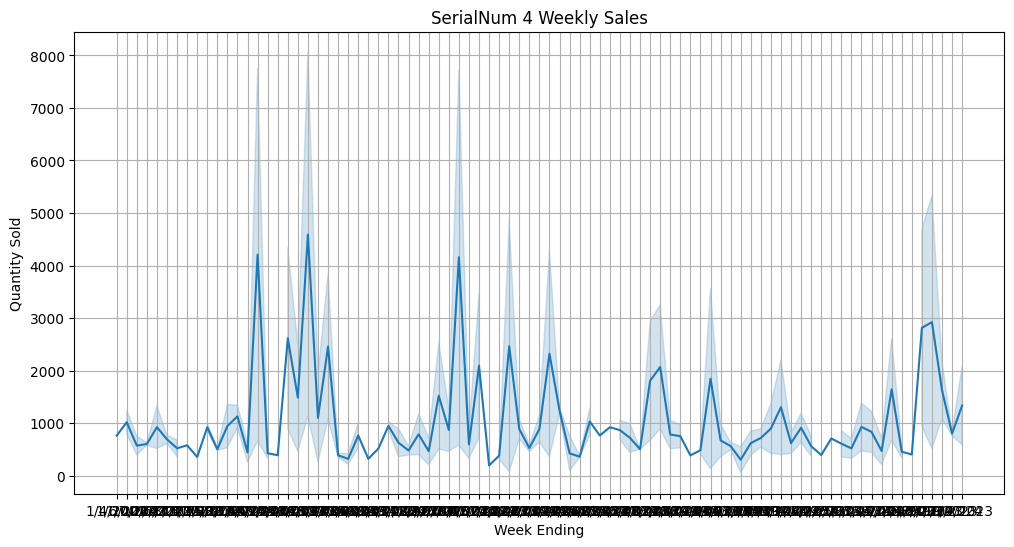

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

serial_nums = df['SerialNum'].unique()

for serial in serial_nums:
    df_serial = df[df['SerialNum'] == serial].sort_values('weekend_date')

    plt.figure(figsize=(12,6))
    sns.lineplot(x='weekend_date', y='quantity', data=df_serial)
    plt.title(f'SerialNum {serial} Weekly Sales')
    plt.xlabel('Week Ending')
    plt.ylabel('Quantity Sold')
    plt.grid()
    plt.show()


Weekly Interval Consistency Check

In [28]:
# Test one SerialNum
serial = serial_nums[0]
df_serial = df[df['SerialNum'] == serial].set_index('weekend_date').sort_index()

# Reindex to weekly frequency
df_serial = df_serial.asfreq('W-SUN')

# Check missing weeks
print(df_serial.isnull().sum())


channel         86
brand           86
category        86
sub_category    86
SerialNum       86
quantity        86
dtype: int64


In [29]:
df.to_csv("cleaned_sales_data.csv", index=False)


In [30]:
from google.colab import files
files.download("cleaned_sales_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>